In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


log_data = pd.read_csv("output.csv",sep = ";", header = None, dtype = float)

log_data = log_data.astype(float)

print(tf.__version__)
input_length = log_data.size

2.12.0


In [212]:

log_data

,0,1,2,3,4,5,6,7,8
0,7.0,2947.0,390.0,2471.0,225.0,93.0,70.0,210.0,406.0
1,7.0,3035.0,531.0,2266.0,237.0,96.0,69.0,207.0,393.0
2,7.0,3003.0,645.0,2004.0,213.0,93.0,138.0,208.0,384.0
3,7.0,3210.0,725.0,1923.0,197.0,89.0,130.0,206.0,364.0
4,7.0,3356.0,822.0,1934.0,217.0,81.0,134.0,208.0,348.0
...,...,...,...,...,...,...,...,...,...
23317,7.0,2259.0,629.0,1832.0,538.0,155.0,10.0,163.0,71.0
23318,7.0,2238.0,487.0,1891.0,582.0,154.0,8.0,166.0,79.0
23319,7.0,2267.0,330.0,1899.0,514.0,119.0,11.0,119.0,77.0
23320,7.0,2280.0,566.0,1881.0,592.0,135.0,12.0,172.0,84.0


In [213]:
log_data.max()



0          7.0
1      24854.0
2      27372.0
3      16811.0
4      18448.0
5       2856.0
6    2742448.0
7       5857.0
8       1885.0
dtype: float64

In [214]:
log_data.min()

0       6.0
1     322.0
2      26.0
3     112.0
4    -119.0
5      14.0
6   -5713.0
7      -5.0
8       4.0
dtype: float64

In [215]:
log_data.idxmax()

0        0
1    16357
2    18341
3    11109
4     2696
5    18346
6    17885
7     1463
8     6083
dtype: int64

In [216]:
log_data.idxmin()

0       44
1     8123
2      500
3    20351
4     4531
5    20070
6    14306
7     7678
8    13987
dtype: int64

In [217]:
#train.iloc[6178]

In [218]:
norm_logData = (log_data - log_data.mean()) / log_data.std()
norm_logData

mean_l = log_data.mean()
std =  log_data.std()
print(mean_l)
print(std)

0        6.516808
1     1991.033102
2      979.100292
3     1384.605909
4      690.083826
5      202.240331
6    50218.089443
7      303.198568
8      152.770388
dtype: float64
0         0.499728
1      1158.654284
2      1460.097603
3       806.427103
4      1100.119750
5       167.640898
6    268559.217730
7       386.393986
8       135.929749
dtype: float64


In [219]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()


log_data_0 = np.stack((norm_logData[1].values,norm_logData[3].values, norm_logData[5].values, norm_logData[7].values), axis=1)
log_data_1 = np.stack((norm_logData[2].values,norm_logData[4].values, norm_logData[6].values, norm_logData[8].values), axis=1)


x_log_data= np.stack((log_data_0,log_data_1), axis=1)

print(x_log_data.shape)
print(x_log_data.max())

print(x_log_data[100])
print(x_log_data[100].shape)
print(x_log_data[100].reshape(1,2,4))

(23322, 2, 4)
19.732345710359745
[[-0.30124007  1.81094371  0.95298743  0.47309596]
 [-0.02198503  0.06900719 -0.0405575   1.87030149]]
(2, 4)
[[[-0.30124007  1.81094371  0.95298743  0.47309596]
  [-0.02198503  0.06900719 -0.0405575   1.87030149]]]


In [220]:
y_log_data  = log_data [0].values
print(y_log_data .shape)



(23322,)


In [221]:
log_data_60 = int(x_log_data.shape[0]*0.6)
log_data_40 = x_log_data.shape[0]-log_data_60 

x_test = x_log_data[log_data_60:]
x_train = x_log_data[:log_data_60]

y_test = y_log_data[log_data_60:]
y_train = y_log_data[:log_data_60]

In [222]:
y_log_data .max()

7.0

In [223]:
y_test


array([6., 6., 6., ..., 7., 7., 7.])

In [224]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 8)
y_cat_test = to_categorical(y_test, 8)


In [225]:
y_cat_train.shape


(13993, 8)

In [226]:
y_cat_test.shape

(9329, 8)

In [227]:
print(y_cat_test[727])
print(y_cat_train[0])

[0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1.]


In [228]:
x_train[334]

array([[-0.28829402, -0.26487938,  0.46384665,  0.10559541],
       [ 0.64098435,  0.14354453, -0.1869833 ,  1.37739982]])

In [229]:
x_test[335]

array([[-0.37373797, -0.40872375, -0.00143361, -0.58540913],
       [-0.171975  ,  0.06900719, -0.18696841, -0.80755235]])

<Axes: >

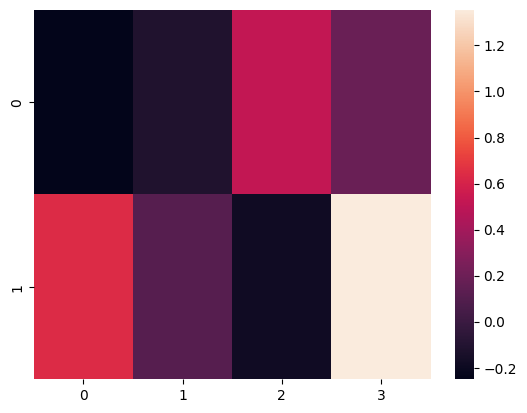

In [230]:
sns.heatmap(x_train[335].reshape(2,4))

<Axes: >

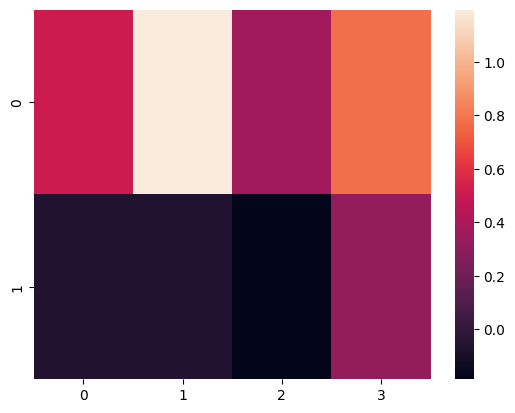

In [231]:
sns.heatmap(x_train[353].reshape(2,4))

In [232]:
from tensorflow.keras.models import Sequential

In [233]:
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, BatchNormalization, Dropout, LeakyReLU, GlobalAveragePooling1D, Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Conv1D, MaxPooling1D
from keras.regularizers import l2


In [234]:
model = Sequential()


model.add(Conv2D(filters = 32, kernel_size= (1,1), activation='relu',kernel_regularizer=l2(0.001),input_shape=(2,4,1)))
#model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size= (1,2), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Conv2D(filters = 32, kernel_size= (2,2), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Flatten())
model.add(Dense(64,activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# OUTPUT LAYER SOFTMAX--> MULTI CLASS
model.add(Dense(8, activation='softmax'))
#keras.io/metrics

model.compile(loss='categorical_crossentropy', optimizer='adam',
metrics=['acc'])



In [235]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 2, 4, 32)          64        
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 3, 32)          2080      
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 2, 32)          4128      
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                

In [236]:
from tensorflow.keras.callbacks import EarlyStopping

In [237]:
early_stop = EarlyStopping (monitor="val_loss", patience=12)

print(x_test.shape)

(9329, 2, 4)


In [238]:
results = model.fit(x_train,y_cat_train,batch_size = 32, verbose = 1 ,epochs=100 ,validation_data=(x_test,y_cat_test),callbacks=[early_stop]) 
#,callbacks=[early_stop]

Epoch 1/100
438/438 [==============================] - 4s 4ms/step - loss: 0.8159 - acc: 0.6070 - val_loss: 0.6886 - val_acc: 0.6214
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 0.6605 - acc: 0.6621 - val_loss: 0.6670 - val_acc: 0.6270
Epoch 3/100
438/438 [==============================] - 2s 4ms/step - loss: 0.6374 - acc: 0.6700 - val_loss: 0.6495 - val_acc: 0.6489
Epoch 4/100
438/438 [==============================] - 2s 4ms/step - loss: 0.6249 - acc: 0.6723 - val_loss: 0.6388 - val_acc: 0.6577
Epoch 5/100
438/438 [==============================] - 2s 4ms/step - loss: 0.6152 - acc: 0.6759 - val_loss: 0.6348 - val_acc: 0.6467
Epoch 6/100
438/438 [==============================] - 2s 6ms/step - loss: 0.6082 - acc: 0.6740 - val_loss: 0.6327 - val_acc: 0.6284
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 0.6021 - acc: 0.6793 - val_loss: 0.6233 - val_acc: 0.6631
Epoch 8/100
438/438 [==============================] - 2s 4ms/step - 

In [239]:
x_test.shape


(9329, 2, 4)

In [262]:
test_ind = 249

my_test = x_train[test_ind]

print(my_test)

print(y_train[test_ind])
print(my_test.reshape(1,2,4,1))
print(model.predict(my_test.reshape(1,2,4,1)))

[[-0.52909061 -0.51164688 -0.68742373 -0.59576126]
 [-0.59865881 -0.59273895 -0.1869833  -0.43971529]]
7.0
[[[[-0.52909061]
   [-0.51164688]
   [-0.68742373]
   [-0.59576126]]

  [[-0.59865881]
   [-0.59273895]
   [-0.1869833 ]
   [-0.43971529]]]]
1/1 [==============================] - 0s 41ms/step
[[7.8270929e-08 3.0368696e-08 5.8848183e-08 5.2309019e-08 2.5802500e-08
  5.4409270e-08 3.0211544e-01 6.9788420e-01]]


In [241]:
log_data.iloc[249]

0       7.0
1    1378.0
2     105.0
3     972.0
4      38.0
5      87.0
6       2.0
7      73.0
8      93.0
Name: 249, dtype: float64

In [242]:
metrics= pd.DataFrame(results.history)

In [243]:
metrics.keys

<bound method NDFrame.keys of         loss       acc  val_loss   val_acc
0   0.815930  0.607018  0.688564  0.621396
1   0.660519  0.662117  0.666953  0.626970
2   0.637385  0.669978  0.649477  0.648944
3   0.624926  0.672265  0.638800  0.657734
4   0.615216  0.675909  0.634843  0.646693
5   0.608157  0.673980  0.632657  0.628363
6   0.602125  0.679268  0.623261  0.663094
7   0.597165  0.687772  0.627366  0.637153
8   0.594095  0.688630  0.633374  0.626434
9   0.590253  0.690631  0.623331  0.654947
10  0.587282  0.689845  0.633588  0.648194
11  0.584335  0.696348  0.618270  0.655054
12  0.580834  0.692918  0.637879  0.632758
13  0.579645  0.698349  0.638060  0.635974
14  0.575377  0.707640  0.632375  0.632651
15  0.574795  0.698063  0.632150  0.632222
16  0.569830  0.707925  0.639619  0.650981
17  0.568591  0.711427  0.642475  0.636939
18  0.566016  0.707282  0.640800  0.645192
19  0.563833  0.715215  0.636946  0.632544
20  0.562396  0.716215  0.637677  0.645192
21  0.561761  0.719217  

<Axes: >

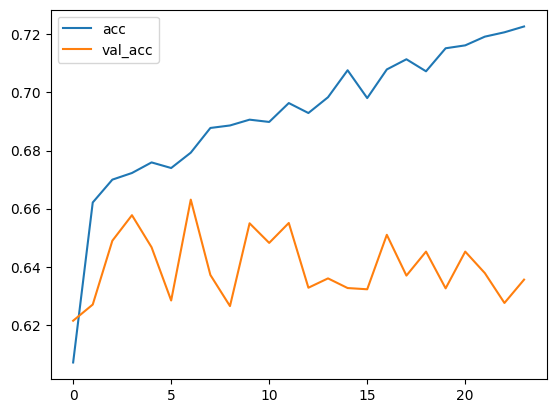

In [244]:
metrics[["acc","val_acc"]].plot()

In [245]:
from sklearn.metrics import classification_report, confusion_matrix

In [246]:

input_data = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
predictions= np.argmax(model.predict(input_data), axis=1)
print(predictions)

292/292 [==============================] - 0s 1ms/step
[6 6 6 ... 6 6 6]


In [247]:
y_cat_test.shape

(9329, 8)

In [248]:
y_test

array([6., 6., 6., ..., 7., 7., 7.])

In [249]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         6.0       0.61      0.73      0.66      4592
         7.0       0.67      0.55      0.60      4737

    accuracy                           0.64      9329
   macro avg       0.64      0.64      0.63      9329
weighted avg       0.64      0.64      0.63      9329



(array([4592.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4737.]),
 array([6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ]),
 <BarContainer object of 10 artists>)

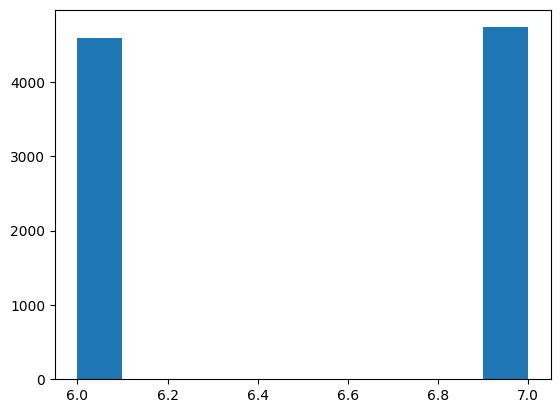

In [250]:
plt.hist(y_test)

(array([6677.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7316.]),
 array([6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ]),
 <BarContainer object of 10 artists>)

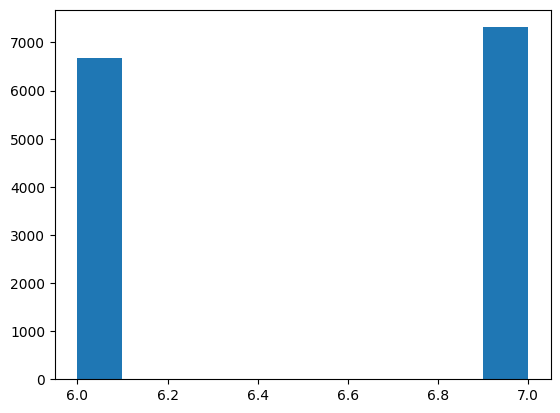

In [251]:
plt.hist(y_train)

In [252]:
model.save('model_Final.h5')

In [253]:
#from tensorflow import keras
#reconstructed_model = keras.models.load_model("model_6and7.h5")

In [254]:
#reconstructed_model.predict_classes(my_test.reshape(1,8))

In [255]:
matrix = confusion_matrix(y_test, predictions)

In [256]:
matrix

array([[3344, 1248],
       [2152, 2585]])

In [257]:
# CODE FROM: https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

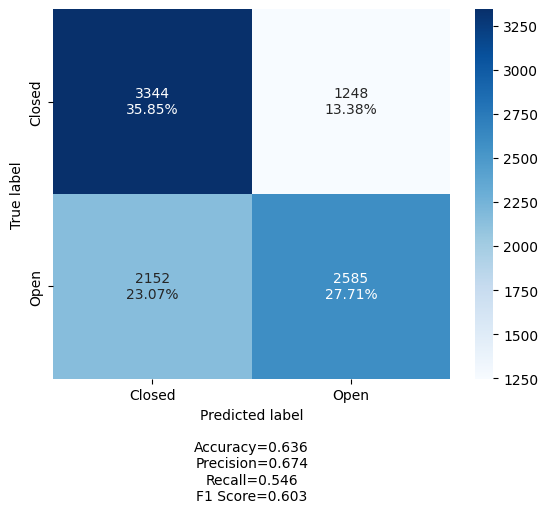

In [258]:
#labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Closed", "Open"]
make_confusion_matrix(matrix, 
                      categories=categories, 
                      )

In [339]:
df1 = log_data.iloc[126:, [0,3]]

df1 = df1.set_axis(["prediction","in1"], axis=1)
df1 = df1.iloc[:22278]
df1




,prediction,in1
126,6.0,634.0
127,6.0,736.0
128,6.0,752.0
129,6.0,723.0
130,6.0,720.0
...,...,...
22399,6.0,1039.0
22400,6.0,1049.0
22401,6.0,1102.0
22402,6.0,1082.0


In [338]:
df2 = pd.read_csv("ReadLog.txt",sep = ";", header = None, dtype = float, on_bad_lines='skip' )
df2 = df2.set_axis(["in1","prediction"], axis=1)

#df2 = df2.iloc[-9329:]
df2


,in1,prediction
0,634.0,6.0
1,736.0,6.0
2,752.0,6.0
3,723.0,6.0
4,720.0,6.0
...,...,...
22273,1039.0,7.0
22274,1049.0,7.0
22275,1102.0,6.0
22276,1082.0,6.0


In [324]:
df3 = df2.merge(df1,on="in1")
df3


,in1,prediction_x,prediction_y
0,1516.0,6.0,6.0
1,1516.0,6.0,7.0
2,1516.0,6.0,7.0
3,1516.0,6.0,7.0
4,1516.0,6.0,7.0
...,...,...,...
63360,2574.0,7.0,7.0
63361,2720.0,7.0,7.0
63362,2606.0,7.0,7.0
63363,2339.0,7.0,7.0


In [340]:
tl_matrix = confusion_matrix( df1['prediction'].values, df2['prediction'].values)

In [341]:
tl_matrix

array([[8431, 2346],
       [4659, 6842]])

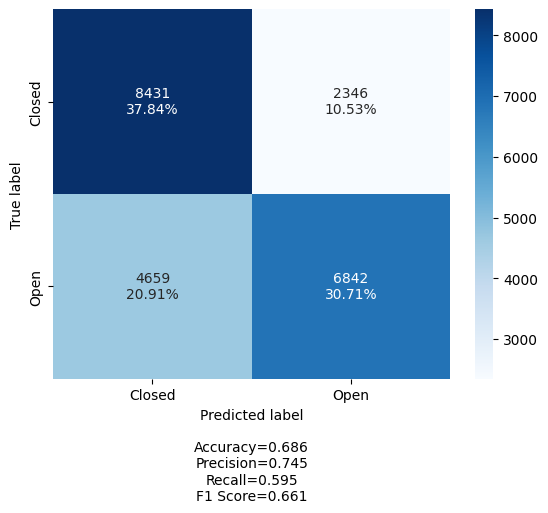

In [342]:

make_confusion_matrix(tl_matrix, 
                      categories=categories, 
                      )

In [343]:
print(classification_report(df1['prediction'].values,df2['prediction'].values))

              precision    recall  f1-score   support

         6.0       0.64      0.78      0.71     10777
         7.0       0.74      0.59      0.66     11501

    accuracy                           0.69     22278
   macro avg       0.69      0.69      0.68     22278
weighted avg       0.70      0.69      0.68     22278

